In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset=pd.read_csv("mobilepricepred.csv")
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
dataset = dataset.fillna(dataset.mean())

In [6]:
x=dataset.iloc[1:,:-1]
y=dataset.iloc[1:,-1]

In [7]:
ss = StandardScaler()
ss.fit_transform(x)

array([[-0.49556717,  1.00955035, -1.25255165, ...,  0.5590537 ,
         0.99351776, -1.01359921],
       [-1.53806689,  1.00955035, -1.25255165, ...,  0.5590537 ,
         0.99351776, -1.01359921],
       [-1.41970447,  1.00955035,  1.19883933, ...,  0.5590537 ,
        -1.00652454, -1.01359921],
       ...,
       [ 1.53025106, -0.99053999, -0.76227345, ...,  0.5590537 ,
         0.99351776, -1.01359921],
       [ 0.62204716, -0.99053999, -0.76227345, ...,  0.5590537 ,
         0.99351776,  0.98658324],
       [-1.6587055 ,  1.00955035,  0.58599159, ...,  0.5590537 ,
         0.99351776,  0.98658324]])

In [8]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [9]:
samples

[(      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
  1973            816     0          3.0         1   2       0           9   
  639             924     0          0.5         1   0       1          47   
  483            1476     0          0.5         0   0       1          43   
  617            1109     1          2.7         1   1       0          39   
  373            1067     1          1.7         1   0       0          58   
  ...             ...   ...          ...       ...  ..     ...         ...   
  836             902     1          0.6         1   0       0          63   
  1217           1451     1          0.5         0   5       1          57   
  1654           1727     1          2.1         1  10       0          57   
  560            1168     0          1.3         0   9       0          61   
  685            1362     0          0.5         0   3       0          25   
  
        m_dep  mobile_wt  n_cores  pc  px_height  px_width   

In [10]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])
     

In [11]:
def fitnessFunction(k,n,e):
  svm = SVC(kernel=k, C=n, gamma=e, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [12]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 4)
      best_C = round(C, 4)
      best_gamma = round(gamma, 4)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]
     

Best Accuracy =  0.9583 Best Kernel =  poly Best Nu =  1.309 Best Epsilon =  3.1683
Best Accuracy =  0.8517 Best Kernel =  linear Best Nu =  8.8641 Best Epsilon =  7.1836
Best Accuracy =  0.955 Best Kernel =  linear Best Nu =  1.4021 Best Epsilon =  2.4915
Best Accuracy =  0.9617 Best Kernel =  linear Best Nu =  2.7704 Best Epsilon =  3.4979
Best Accuracy =  0.945 Best Kernel =  poly Best Nu =  6.9852 Best Epsilon =  9.9517
Best Accuracy =  0.9367 Best Kernel =  poly Best Nu =  8.1221 Best Epsilon =  4.3465
Best Accuracy =  0.9317 Best Kernel =  poly Best Nu =  7.1394 Best Epsilon =  0.1062
Best Accuracy =  0.9367 Best Kernel =  poly Best Nu =  4.3072 Best Epsilon =  4.6464
Best Accuracy =  0.95 Best Kernel =  poly Best Nu =  7.0095 Best Epsilon =  6.8766
Best Accuracy =  0.9417 Best Kernel =  poly Best Nu =  9.9486 Best Epsilon =  6.8816


In [13]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [14]:
def fitnessFunction2(k,n,e,i):
  svm = SVC(kernel=k, C=n, gamma=e, max_iter=i*10)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)


In [15]:
bestaccuracy=[]
iteration=[]
best_accuracy = 0
best_c=0
best_gamma = 0
for i in range(0,100):
  for kernel in kernels:
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction2(kernel, C, gamma,i)
    if score>best_accuracy:
      best_accuracy = round(score, 4)
      best_C = round(C, 4)
      best_gamma = round(gamma, 4)
      best_kernel = kernel
  bestaccuracy.append(best_accuracy)
  iteration.append(i*10)
   

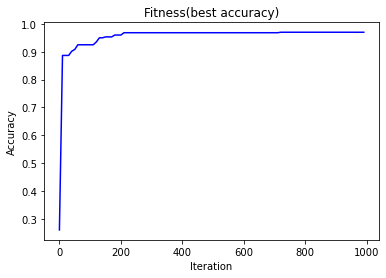

In [20]:
import matplotlib.pyplot as plt
plt.title("Fitness(best accuracy)")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.plot(iteration, bestaccuracy, color ="blue")
plt.show()
